## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\TANYA\\Desktop\\Medical_Fraud_Data'

## Reading the data

In [3]:
beneficiary_data = pd.read_csv("C:\\Users\\TANYA\\Desktop\\Medical_Fraud_Data\\Train_Beneficiarydata-1542865627584.csv")
inpatient_data = pd.read_csv("C:\\Users\\TANYA\\Desktop\\Medical_Fraud_Data\\Train_Inpatientdata-1542865627584.csv")
outpatient_data = pd.read_csv("C:\\Users\\TANYA\\Desktop\\Medical_Fraud_Data\\Train_Outpatientdata-1542865627584.csv")
train_data = pd.read_csv("C:\\Users\\TANYA\\Desktop\\Medical_Fraud_Data\\Train-1542865627584.csv")

## Visualising the Data

In [4]:
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
inpatient_data.sample(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
4991,BENE28926,CLM67855,2009-09-13,2009-09-18,PRV57284,4000,PHY367706,NaN,NaN,2009-09-13,...,5362,E8798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39835,BENE156914,CLM75191,2009-11-08,2009-11-16,PRV54339,7000,PHY424162,PHY402518,NaN,2009-11-08,...,8840,80505,3004,2449,8841.0,NaN,NaN,NaN,NaN,NaN
21434,BENE89427,CLM79032,2009-12-09,2009-12-12,PRV57227,5000,PHY324704,PHY324704,NaN,2009-12-09,...,4779,42731,1104,NaN,3898.0,NaN,NaN,NaN,NaN,NaN
31937,BENE127924,CLM45485,2009-04-04,2009-04-09,PRV54676,5000,PHY391553,PHY341013,NaN,2009-04-04,...,4280,4019,NaN,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
19798,BENE83453,CLM56509,2009-06-21,2009-06-23,PRV52019,6000,PHY410774,NaN,NaN,2009-06-21,...,34831,53081,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient_data.sample(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
183810,BENE63810,CLM271217,2009-03-28,2009-03-28,PRV52019,500,PHY318062,NaN,PHY416093,V772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
380786,BENE120082,CLM210744,2009-02-23,2009-02-23,PRV56511,30,PHY355160,NaN,NaN,2449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
22509,BENE17402,CLM300685,2009-04-13,2009-04-13,PRV53797,90,PHY360043,NaN,NaN,2721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
183699,BENE63770,CLM331397,2009-04-29,2009-04-30,PRV51574,400,PHY415321,NaN,NaN,27951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
321400,BENE103162,CLM522824,2009-08-13,2009-08-13,PRV54566,10,PHY370431,NaN,NaN,V5876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
train_data.sample(5)

,Provider,PotentialFraud
4810,PRV57033,No
3619,PRV55538,No
2595,PRV54231,No
4195,PRV56251,No
999,PRV52248,No


## Checking Type

In [8]:
beneficiary_data.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
inpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [10]:
outpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [11]:
train_data.dtypes

Provider          object
PotentialFraud    object
dtype: object

## Number of rows and columns

In [12]:
print(inpatient_data.shape)
print(outpatient_data.shape)
print(train_data.shape)
print(beneficiary_data.shape)

(40474, 30)
(517737, 27)
(5410, 2)
(138556, 25)


## Merging the Datasets

In [13]:
mergeddata1 = inpatient_data.append(outpatient_data,ignore_index=False)

In [14]:
mergeddata1.shape

(558211, 30)

In [15]:
mergeddata2=pd.merge(mergeddata1,beneficiary_data, how='left', on=['BeneID'])

In [16]:
mergeddata2.shape

(558211, 54)

In [17]:
finaltraindata=pd.merge(mergeddata2,train_data, how='inner',on=['Provider'])

In [18]:
finaltraindata.shape

(558211, 55)

In [19]:
finaltraindata.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.578838,1.255011,...,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.717437,...,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [20]:
finaltraindata.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

## Feature Engineering
- Extracting No.Of ClaimDays

In [21]:
from datetime import datetime
date_format = "%d/%m/%Y"
from datetime import date

In [22]:
finaltraindata.ClaimStartDt = pd.to_datetime(finaltraindata.ClaimStartDt)
finaltraindata.ClaimEndDt = pd.to_datetime(finaltraindata.ClaimEndDt)

In [23]:
finaltraindata['No_of_claimdays']=finaltraindata['ClaimEndDt']-finaltraindata['ClaimStartDt']

In [24]:
finaltraindata['No_of_claimdays'].head(5)

0    6 days
1   12 days
2   18 days
3    4 days
4    4 days
Name: No_of_claimdays, dtype: timedelta64[ns]

- Extracting Days in Hospital

In [25]:
finaltraindata.AdmissionDt = pd.to_datetime(finaltraindata.AdmissionDt)
finaltraindata.DischargeDt = pd.to_datetime(finaltraindata.DischargeDt)

In [26]:
finaltraindata['Days_in_Hospital']=finaltraindata['DischargeDt']-finaltraindata['AdmissionDt']

In [27]:
finaltraindata['Days_in_Hospital'].head(5)

0    6 days
1   12 days
2   18 days
3    4 days
4    4 days
Name: Days_in_Hospital, dtype: timedelta64[ns]

In [28]:
finaltraindata['Days_in_Hospital'].equals(finaltraindata['No_of_claimdays'])

False

In [29]:
finaltraindata['Days_in_Hospital'].sample(5)

20790    NaT
300655   NaT
127847   NaT
356275   NaT
367241   NaT
Name: Days_in_Hospital, dtype: timedelta64[ns]

 - Extracting Age

In [30]:
finaltraindata.DOB = pd.to_datetime(finaltraindata.DOB)
finaltraindata['DOB'].head(5)

0   1943-01-01
1   1913-12-01
2   1922-10-01
3   1930-07-01
4   1925-09-01
Name: DOB, dtype: datetime64[ns]

In [31]:
finaltraindata['DOD'].count()

4131

-- filling remaining values with a date to calculate age

In [32]:
finaltraindata['DOD']=finaltraindata['DOD'].fillna('2009-12-31')

In [33]:
finaltraindata['DOD'] = pd.to_datetime(finaltraindata.DOD)

In [34]:
finaltraindata['Age'] = finaltraindata['DOD']-finaltraindata['DOB'] 
finaltraindata['Age'] = ((finaltraindata['DOD'] - finaltraindata['DOB'])/365).dt.days 

-- Removing the Columns after extracting the features from them

In [35]:
finaltraindata=finaltraindata.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DOB','DOD'],axis=1)

In [36]:
finaltraindata.dtypes

BeneID                                      object
ClaimID                                     object
Provider                                    object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
OperatingPhysician                          object
OtherPhysician                              object
ClmAdmitDiagnosisCode                       object
DeductibleAmtPaid                          float64
DiagnosisGroupCode                          object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6                          object
ClmDiagnosisCode_7                          object
ClmDiagnosisCode_8                          object
ClmDiagnosisCode_9                          object
ClmDiagnosisCode_10            

## Type Conversion

In [37]:
finaltraindata['DeductibleAmtPaid']= finaltraindata['DeductibleAmtPaid'].fillna(finaltraindata['DeductibleAmtPaid'].mean())

In [38]:

finaltraindata.No_of_claimdays= finaltraindata.No_of_claimdays.astype('int64')
finaltraindata.DeductibleAmtPaid = finaltraindata.DeductibleAmtPaid.astype('int64')

In [39]:
catcol = ('Race','Gender','RenalDiseaseIndicator','Provider','State','County','ChronicCond_Alzheimer',
          'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
          'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
          'ChronicCond_rheumatoidarthritis','ChronicCond_stroke','PotentialFraud')

In [40]:
for i in catcol:
    finaltraindata[i] = finaltraindata[i].astype('category')

In [41]:
finaltraindata.dtypes

BeneID                                      object
ClaimID                                     object
Provider                                  category
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
OperatingPhysician                          object
OtherPhysician                              object
ClmAdmitDiagnosisCode                       object
DeductibleAmtPaid                            int64
DiagnosisGroupCode                          object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6                          object
ClmDiagnosisCode_7                          object
ClmDiagnosisCode_8                          object
ClmDiagnosisCode_9                          object
ClmDiagnosisCode_10            

## Data Analysis

In [42]:
finaltraindata['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

Text(0, 0.5, 'No. of Claims')

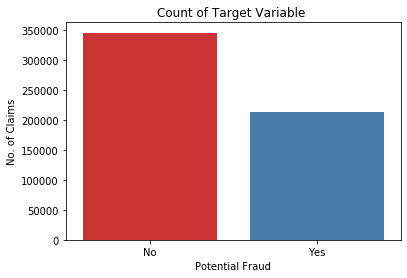

In [43]:
sns.countplot(x='PotentialFraud',data=finaltraindata,palette='Set1')
plt.title("Count of Target Variable ")
plt.xlabel('Potential Fraud')
plt.ylabel('No. of Claims')

## We can see that total no. of FRAUD claims are significant and accounts upto 40% of total claims

Text(0, 0.5, 'No. of People')

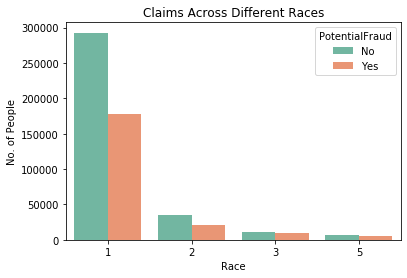

In [44]:
sns.countplot(x="Race",hue="PotentialFraud",palette='Set2',data=finaltraindata)
plt.title("Claims Across Different Races")
plt.xlabel('Race')
plt.ylabel('No. of People')

## Claims belonging to Race 3 having high probality of being Fraud

Text(0.5, 1.0, 'Distribution of Beneficiaries among Different Age Groups')

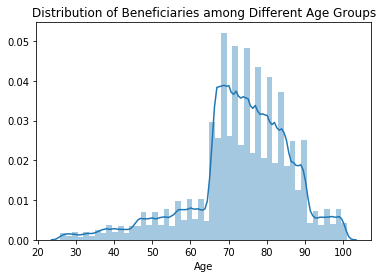

In [45]:
sns.distplot(finaltraindata['Age'])
plt.title('Distribution of Beneficiaries among Different Age Groups')

## Insurance Claims are mostly taken from the age group of 65-90

Text(0.5, 1.0, 'Insurance Amount Reimbursed w.r.t Gender')

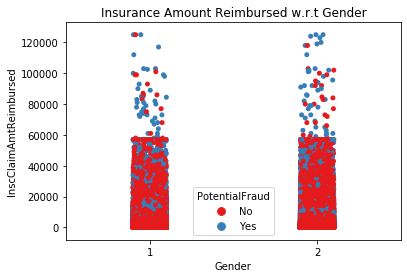

In [46]:
sns.stripplot(x="Gender", y="InscClaimAmtReimbursed", data=finaltraindata,jitter=True,hue='PotentialFraud',palette='Set1')
plt.title('Insurance Amount Reimbursed w.r.t Gender')

## Insurance Fraud is seen in both the Gender

## And if the Amount to be Reimbursed greater than 60000 for a claim, It has higher probability of Being a Fraud

Text(0.5, 1.0, 'Claims Across States')

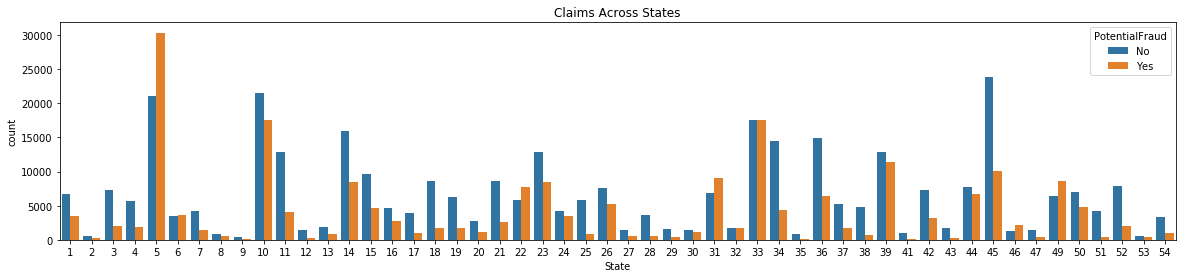

In [47]:
plt.figure(figsize=(20,4))
sns.countplot(x='State',hue="PotentialFraud",data=finaltraindata)
plt.title('Claims Across States')

## Claims in State 5 & 33 are having higher probability of being Fraud 

Text(0.5, 1.0, 'Claims w.r.t IP annual reimbursement amount')

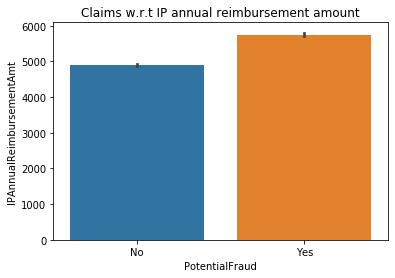

In [48]:
from numpy import median,mean
sns.barplot(x="PotentialFraud", y="IPAnnualReimbursementAmt", data=finaltraindata, estimator=mean)
plt.title('Claims w.r.t IP annual reimbursement amount')

## If the Annual Reimbursement Amount for a provider is greater than 50000 the claims of the respective provider seems to be Fraud